In [1]:
!pip install ucimlrepo

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             confusion_matrix, classification_report, roc_curve, auc)
from sklearn.svm import SVC

In [86]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
breast_cancer_wisconsin_original = fetch_ucirepo(id=15)

# data (as pandas dataframes)
X = breast_cancer_wisconsin_original.data.features
y = breast_cancer_wisconsin_original.data.targets

# metadata
print(breast_cancer_wisconsin_original.metadata)

# variable information
print(breast_cancer_wisconsin_original.variables)


{'uci_id': 15, 'name': 'Breast Cancer Wisconsin (Original)', 'repository_url': 'https://archive.ics.uci.edu/dataset/15/breast+cancer+wisconsin+original', 'data_url': 'https://archive.ics.uci.edu/static/public/15/data.csv', 'abstract': 'Original Wisconsin Breast Cancer Database', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 699, 'num_features': 9, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['Class'], 'index_col': ['Sample_code_number'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1990, 'last_updated': 'Sun Mar 10 2024', 'dataset_doi': '10.24432/C5HP4Z', 'creators': ['WIlliam Wolberg'], 'intro_paper': None, 'additional_info': {'summary': "Samples arrive periodically as Dr. Wolberg reports his clinical cases. The database therefore reflects this chronological grouping of the data. This grouping information appears immediately below, having been removed fro

In [87]:
x=(breast_cancer_wisconsin_original.data.original)
df1=pd.DataFrame(x)
df1

,Sample_code_number,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2.0,1,1,1,2
695,841769,2,1,1,1,2,1.0,1,1,1,2
696,888820,5,10,10,3,7,3.0,8,10,2,4
697,897471,4,8,6,4,3,4.0,10,6,1,4


In [88]:
# Check for missing values
print(df1.isnull().sum())


Sample_code_number              0
Clump_thickness                 0
Uniformity_of_cell_size         0
Uniformity_of_cell_shape        0
Marginal_adhesion               0
Single_epithelial_cell_size     0
Bare_nuclei                    16
Bland_chromatin                 0
Normal_nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64


In [89]:
print(df1['Bare_nuclei'].unique())

[ 1. 10.  2.  4.  3.  9.  7. nan  5.  8.  6.]


In [90]:
# Handle missing values (replacing with mode)
# Replace '?' with NaN
df1['Bare_nuclei'] = df1['Bare_nuclei'].replace('?', np.nan)

# Convert 'Bare_nuclei' column to numeric
df1['Bare_nuclei'] = pd.to_numeric(df1['Bare_nuclei'])

# Impute missing values in 'Bare_nuclei' with the mode
df1['Bare_nuclei'] = df1['Bare_nuclei'].fillna(df1['Bare_nuclei'].mode()[0])

# Verify if missing values are handled
print(df1.isnull().sum())
print(df1['Bare_nuclei'].unique())


Sample_code_number             0
Clump_thickness                0
Uniformity_of_cell_size        0
Uniformity_of_cell_shape       0
Marginal_adhesion              0
Single_epithelial_cell_size    0
Bare_nuclei                    0
Bland_chromatin                0
Normal_nucleoli                0
Mitoses                        0
Class                          0
dtype: int64
[ 1. 10.  2.  4.  3.  9.  7.  5.  8.  6.]


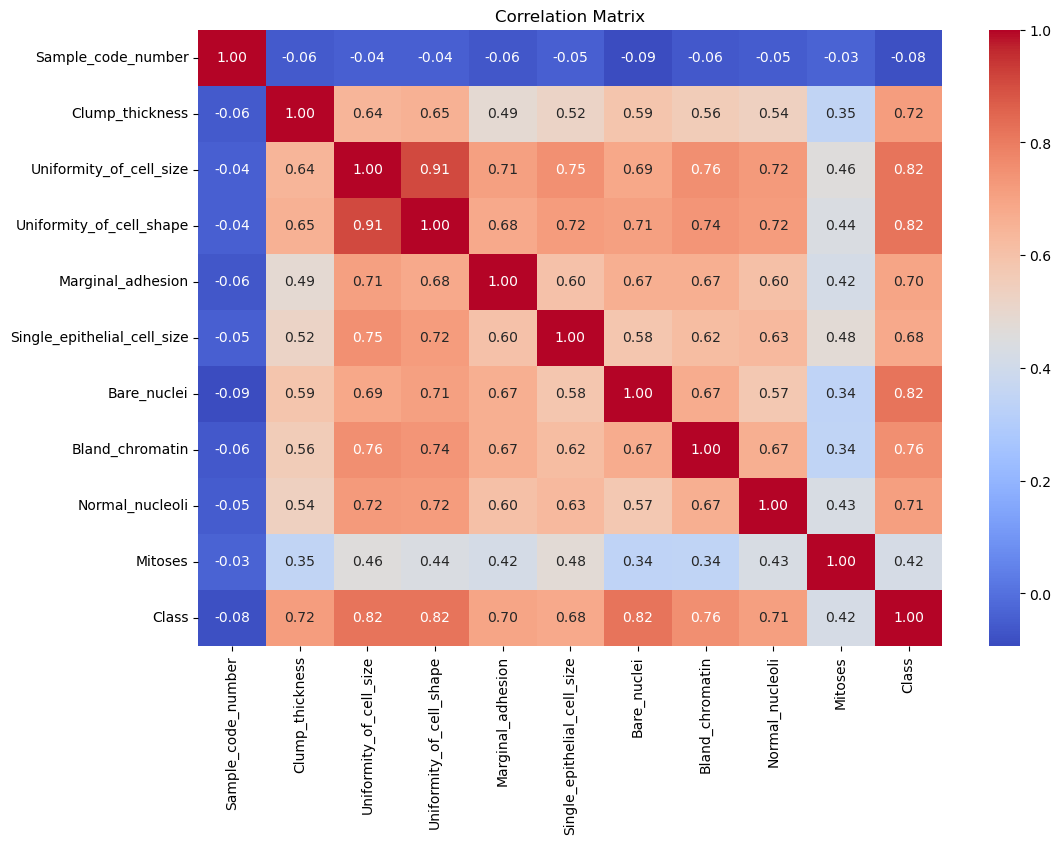

In [91]:
#Correlation Matrix
plt.figure(figsize=(12, 8))
correlation_matrix = df1.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


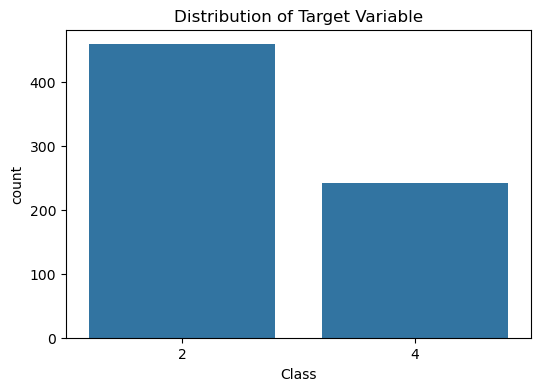

In [92]:
#Check the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=df1)
plt.title('Distribution of Target Variable')
plt.show()

In [93]:
# Relabel target values: 2 = Benign → 0, 4 = Malignant → 1
df1['Class'] = df1['Class'].replace({2: 0, 4: 1})

# Features and target
X = df1.drop(['Class', 'Sample_code_number'], axis=1)
y = df1['Class']

In [94]:
#Select features and target variable
#We will use all numeric features except for Sample_code_number
X = df1.drop(['Class', 'Sample_code_number'], axis=1)
y = df1['Class']
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
#Stan

In [95]:
# prompt: # Split data into training and testing sets

# Split data into features (X) and target (y)
X = df1.drop('Class', axis=1)
y = df1['Class']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#Standardize features for SVM
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [96]:
#SVM Models
svm_models={
    'SVC(RBF kernel)' : SVC(kernel='rbf'),
    'Linear SVM' : SVC(kernel='linear'),
    'Polynomial SVM' : SVC(kernel='poly',degree=3)
}

In [97]:
print("\nSVM Models:\n")
for name, model in svm_models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    print(f"{name}Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred))


SVM Models:

SVC(RBF kernel)Accuracy: 0.9786
              precision    recall  f1-score   support

           0       0.98      0.99      0.98        95
           1       0.98      0.96      0.97        45

    accuracy                           0.98       140
   macro avg       0.98      0.97      0.98       140
weighted avg       0.98      0.98      0.98       140

Linear SVMAccuracy: 0.9429
              precision    recall  f1-score   support

           0       0.93      0.99      0.96        95
           1       0.97      0.84      0.90        45

    accuracy                           0.94       140
   macro avg       0.95      0.92      0.93       140
weighted avg       0.94      0.94      0.94       140

Polynomial SVMAccuracy: 0.9357
              precision    recall  f1-score   support

           0       0.92      0.99      0.95        95
           1       0.97      0.82      0.89        45

    accuracy                           0.94       140
   macro avg       0.95 

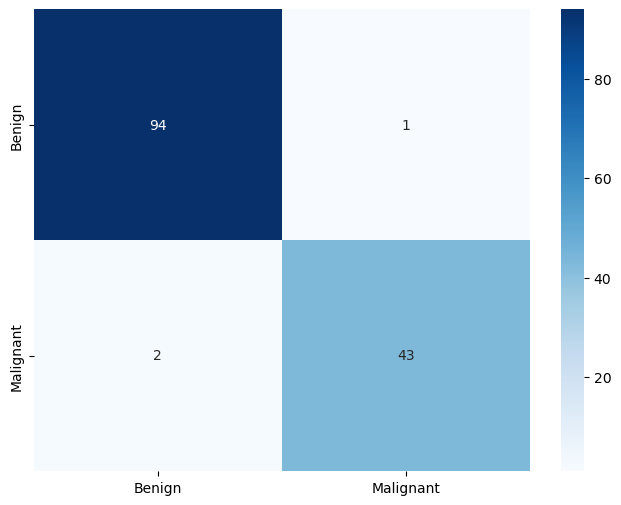

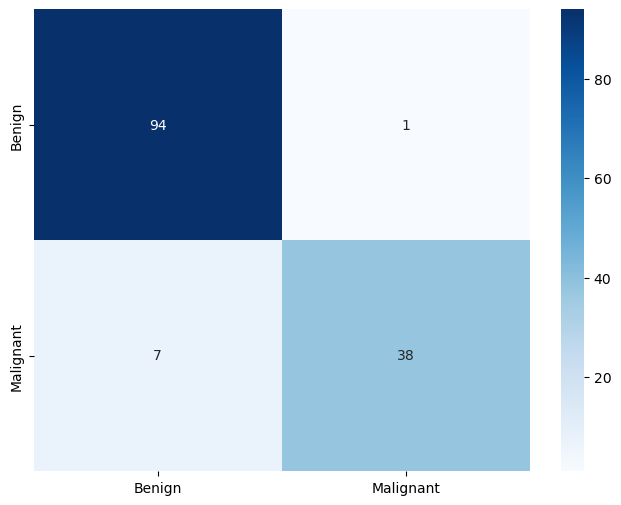

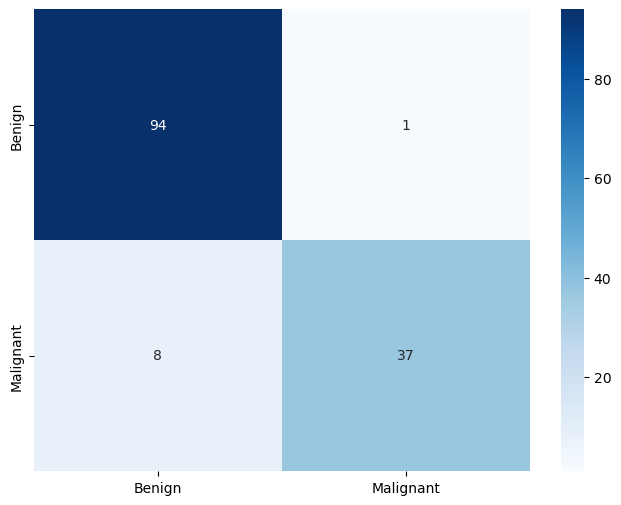

In [98]:
#Confusion Matrix
for name, model in svm_models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    conf_matrix = confusion_matrix(y_test, y_pred)
#Plotting it
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
                xticklabels=['Benign', 'Malignant'],
                yticklabels=['Benign', 'Malignant'])

<h1>Neural Network</h1>

In [100]:
# Define hyperparameter grid for alpha
param_grid = {
    'alpha': [0.0001, 0.001, 0.01],
}


In [101]:
# GridSearchCV for best alpha
grid_search = GridSearchCV(MLPClassifier(max_iter=1000), param_grid, cv=5, n_jobs=-1, scoring='accuracy', verbose=2)

# Train the model using GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and best model
best_alpha = grid_search.best_params_['alpha']

print(f"\nBest Parameters: {grid_search.best_params_}")

Fitting 5 folds for each of 3 candidates, totalling 15 fits

Best Parameters: {'alpha': 0.01}


In [102]:
# Train Neural Network with best alpha
nn_model = MLPClassifier(hidden_layer_sizes=(64, 32, 16), activation='logistic',
                         max_iter=1000, random_state=42, alpha=best_alpha)

In [103]:
nn_model.fit(X_train_scaled, y_train)

y_pred = nn_model.predict(X_test_scaled)

In [104]:
# Evaluation
print("\nNeural Network Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Classification Report with labels
target_names = ['Benign', 'Malignant']
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names))

# Cross-validation
cv_scores = cross_val_score(nn_model, X_scaled, y, cv=5, scoring='accuracy')
print(f"\nCross-validation scores (5-fold): {cv_scores}")
print(f"Mean cross-validation accuracy: {cv_scores.mean():.4f}")


Neural Network Performance:
Accuracy: 0.9642857142857143
Precision: 0.9545454545454546
Recall: 0.9333333333333333
F1 Score: 0.9438202247191011

Confusion Matrix:
 [[93  2]
 [ 3 42]]

Classification Report:
               precision    recall  f1-score   support

      Benign       0.97      0.98      0.97        95
   Malignant       0.95      0.93      0.94        45

    accuracy                           0.96       140
   macro avg       0.96      0.96      0.96       140
weighted avg       0.96      0.96      0.96       140


Cross-validation scores (5-fold): [0.93571429 0.93571429 0.98571429 0.97142857 0.99280576]
Mean cross-validation accuracy: 0.9643


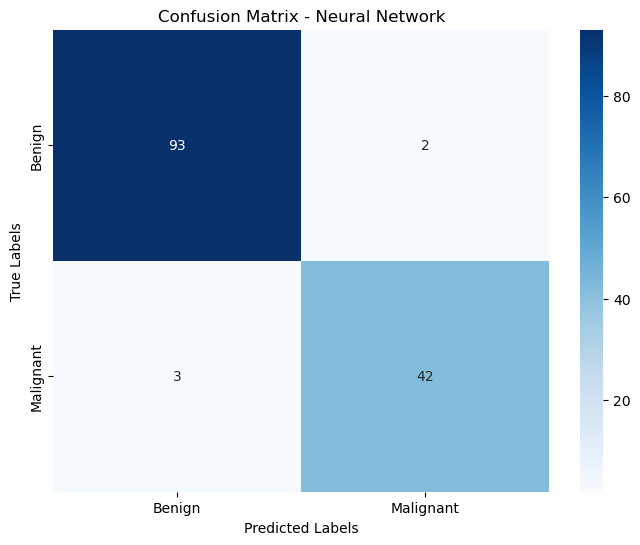

In [105]:
# Confusion Matrix for Neural Network
conf_matrix_nn = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nn, annot=True, fmt="d", cmap="Blues", 
            xticklabels=['Benign', 'Malignant'], 
            yticklabels=['Benign', 'Malignant'])

plt.title('Confusion Matrix - Neural Network')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

<h1>Comparison</h1>

In [107]:
svm_model = SVC(kernel='rbf', probability=True, random_state=42)
svm_model.fit(X_train_scaled, y_train)

SVC(probability=True, random_state=42)

In [108]:
models = {
    "Neural Network": nn_model,
    "SVM": svm_model
}

for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    print(f"\n{name} Performance:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred, target_names=["Benign", "Malignant"]))



Neural Network Performance:
Accuracy: 0.9642857142857143
Precision: 0.9545454545454546
Recall: 0.9333333333333333
F1 Score: 0.9438202247191011
Confusion Matrix:
 [[93  2]
 [ 3 42]]
Classification Report:
               precision    recall  f1-score   support

      Benign       0.97      0.98      0.97        95
   Malignant       0.95      0.93      0.94        45

    accuracy                           0.96       140
   macro avg       0.96      0.96      0.96       140
weighted avg       0.96      0.96      0.96       140


SVM Performance:
Accuracy: 0.9785714285714285
Precision: 0.9772727272727273
Recall: 0.9555555555555556
F1 Score: 0.9662921348314607
Confusion Matrix:
 [[94  1]
 [ 2 43]]
Classification Report:
               precision    recall  f1-score   support

      Benign       0.98      0.99      0.98        95
   Malignant       0.98      0.96      0.97        45

    accuracy                           0.98       140
   macro avg       0.98      0.97      0.98       140


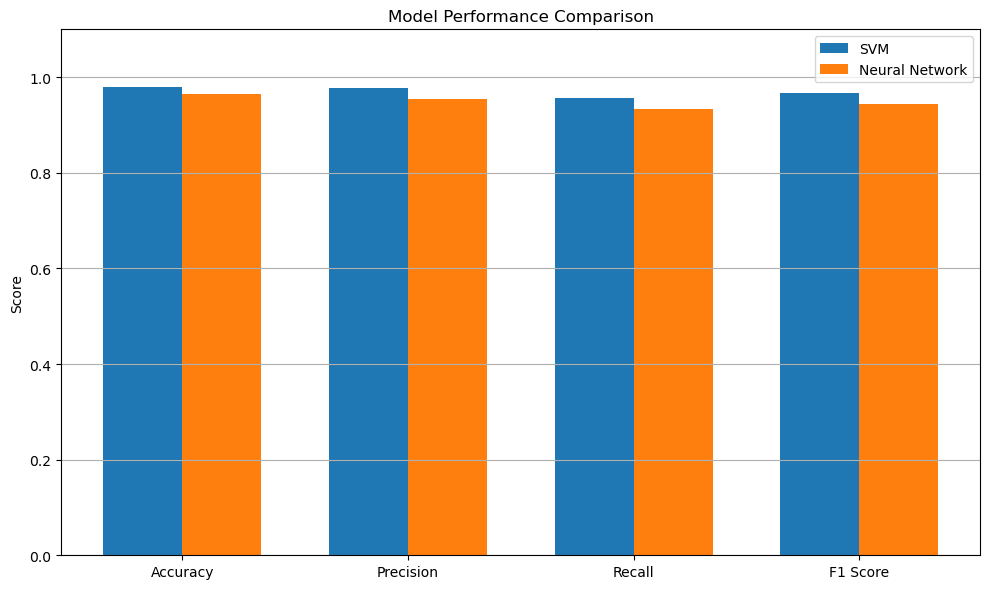

In [109]:
import numpy as np

# Collect metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
svm_pred = svm_model.predict(X_test_scaled)
nn_pred = nn_model.predict(X_test_scaled)

svm_scores = [
    accuracy_score(y_test, svm_pred),
    precision_score(y_test, svm_pred),
    recall_score(y_test, svm_pred),
    f1_score(y_test, svm_pred)
]

nn_scores = [
    accuracy_score(y_test, nn_pred),
    precision_score(y_test, nn_pred),
    recall_score(y_test, nn_pred),
    f1_score(y_test, nn_pred)
]

x = np.arange(len(metrics))
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, svm_scores, width, label='SVM')
plt.bar(x + width/2, nn_scores, width, label='Neural Network')

plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.xticks(x, metrics)
plt.ylim(0, 1.1)
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()


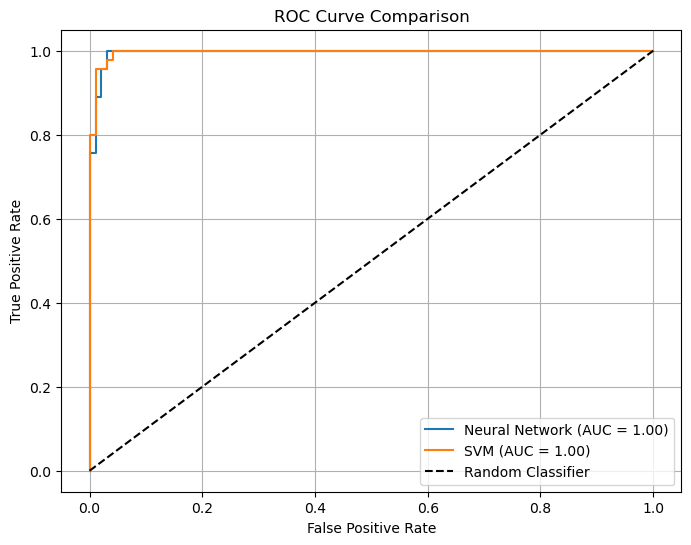

In [110]:
plt.figure(figsize=(8, 6))

for name, model in models.items():
    y_prob = model.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid(True)
plt.show()


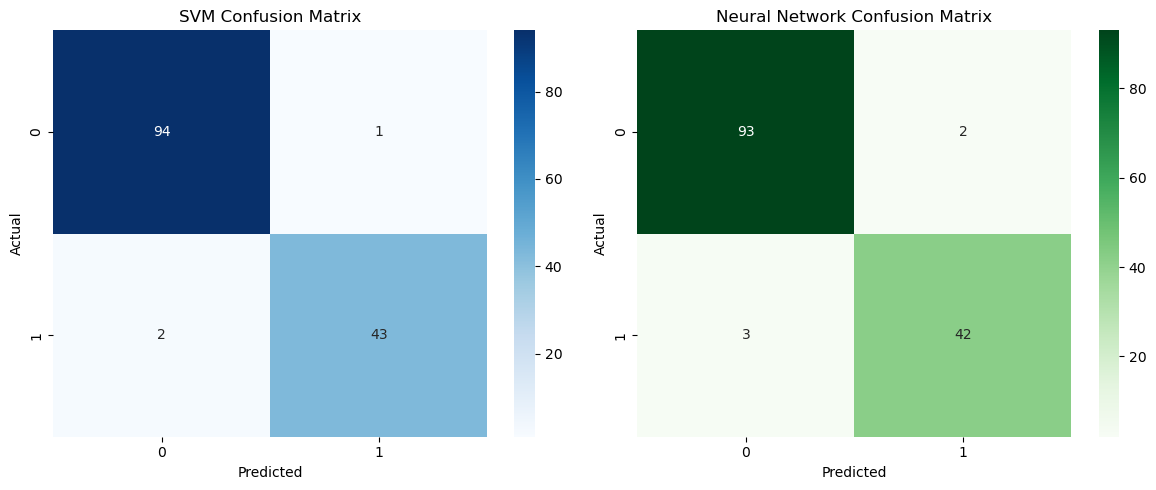

In [111]:
# Get SVM model predictions (assuming you've trained your SVM models already)
y_pred_svm = svm_model.predict(X_test_scaled)  # Replace with the appropriate SVM model

# Get Neural Network model predictions
y_pred_nn = nn_model.predict(X_test_scaled)

# Plot confusion matrices for both models
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# SVM Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Blues', ax=axs[0])
axs[0].set_title('SVM Confusion Matrix')
axs[0].set_xlabel('Predicted')
axs[0].set_ylabel('Actual')

# Neural Network Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_nn), annot=True, fmt='d', cmap='Greens', ax=axs[1])
axs[1].set_title('Neural Network Confusion Matrix')
axs[1].set_xlabel('Predicted')
axs[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()
